<a href="https://colab.research.google.com/github/jpcanamaque/codingdojo-project/blob/master/CodingDojo_Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
Authored by Johnroe Paulo Canamaque

## Part 1: Modules and Data Import

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt

# split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# pipeline processing
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Misc
from sklearn import set_config
set_config(display='diagram')

In [2]:
# Import sales dataset

sales_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTB8dpLqxYs1II-ubJFUnfFu2jO8TEVnDPjAJ2rl3Yup02v-UzBapk3tE_Vft51jvAkwftMpsWBCJpn/pub?output=csv')
sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Part 2: Data Cleansing

In [3]:
# Getting the shape of the dataframe to determine row and column count
sales_df.shape

# There are 8523 rows and 12 columns for this dataframe

(8523, 12)

In [4]:
# Checking the data types of each columns, and from here, try to set the right
# data type for the columns

sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# In this part, we will check if we have values that are not standardized
# For this, we will check for each columns and check for the values generated
for col in sales_df.columns:
  display(f"Check for column {col}: ")
  display(sales_df[col].value_counts())
  display("=============================")

'Check for column Item_Identifier: '

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

'============================='

'Check for column Item_Weight: '

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

'============================='

'Check for column Item_Fat_Content: '

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

'============================='

'Check for column Item_Visibility: '

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

'============================='

'Check for column Item_Type: '

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

'============================='

'Check for column Item_MRP: '

172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64

'============================='

'Check for column Outlet_Identifier: '

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

'============================='

'Check for column Outlet_Establishment_Year: '

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

'============================='

'Check for column Outlet_Size: '

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

'============================='

'Check for column Outlet_Location_Type: '

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

'============================='

'Check for column Outlet_Type: '

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

'============================='

'Check for column Item_Outlet_Sales: '

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

'============================='

In [6]:
# After observing the output, we noticed that the Item_Fat_Content contains
# multiple values that may be the same with other existing values

# For this case, we need to standardize the current values to make sure that the
# values are not scattered to different categories that are possible the same

# Standardizing values for Item_Fat_Content
sales_df['Item_Fat_Content'] = sales_df['Item_Fat_Content'].str.title()
ifc_std = {"Lf": "Low Fat", 'Reg': "Regular"}
sales_df.replace({'Item_Fat_Content' : ifc_std}, inplace=True)
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
# Duplicate checking
# We need to remove duplicate values in order to ensure the quality of the data
# And to prevent it from messing up with out future calculations

len(sales_df[sales_df.duplicated() == True])

# Since there are no duplicate values, we can proceed with the next steps

0

In [8]:
# Initial Checking for NA values

sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# sales_df = sales_df.astype({'Outlet_Establishment_Year':object})

In [10]:
# Rechecking for NA values and duplicates
display(f"Duplicate count: {len(sales_df[sales_df.duplicated() == True])}")
display("=========================================")
sales_df.info()

'Duplicate count: 0'

'========================================='

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
# Doing some final check to all the columns in the dataframe by doing some
# stat work

sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [12]:
# Final view of the cleaned data

sales_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Part 3: ML Pre-processing

For our target and features setting, we are going to use `Item_Outlet_Sales` as our target, the rest will be treated as a feature.

Since `Item_Identifier` and `Outlet_Identifier` are independent variables and does not show direct relevance to our training, we will be removing them as well.

In [13]:
# Identify targets and features
# X = sales_df.drop(columns=['Item_Outlet_Sales'])
X = sales_df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
y = sales_df['Item_Outlet_Sales']

In [14]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
# Showing all columns with object data type
cat_cols = X_train.select_dtypes(include='object').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [16]:
# Checking all unique values of the columns with object data type
for col in cat_cols:
  print(f"Check for column {col}: ")
  print(X_train[col].unique())
  print("="*50)

Check for column Item_Fat_Content: 
['Low Fat' 'Regular']
Check for column Item_Type: 
['Household' 'Snack Foods' 'Meat' 'Baking Goods' 'Frozen Foods' 'Breads'
 'Canned' 'Fruits and Vegetables' 'Soft Drinks' 'Starchy Foods'
 'Health and Hygiene' 'Dairy' 'Hard Drinks' 'Breakfast' 'Seafood' 'Others']
Check for column Outlet_Size: 
['Medium' 'Small' nan 'High']
Check for column Outlet_Location_Type: 
['Tier 3' 'Tier 1' 'Tier 2']
Check for column Outlet_Type: 
['Supermarket Type2' 'Supermarket Type1' 'Grocery Store'
 'Supermarket Type3']


In [17]:
# Showing all columns with object data type
X_train.select_dtypes(include='number').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

Based on the information above, the columns are classified as following:

| Name            | Data Type |
|-----------------|-----------|
| Item_Weight | numerical |
| Item_Fat_Content | nominal |
| Item_Visibility | numerical |
| Item_Type | nominal |
| Item_MRP | numerical  |
| Outlet_Establishment_Year | numerical |
| Outlet_Size | ordinal |
| Outlet_Location_Type | ordinal |
| Outlet_Type | ordinal |





In [18]:
# Creating the ordinal list for ordinal encoding
outlet_size_label = ['Small', 'Medium', 'High']
outlet_loc_type_label =  ['Tier 1', 'Tier 2', 'Tier 3']
outlet_type_label = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
# ifc_label = ['Low Fat', 'Regular']

# create a var for these lists
# ordered_labels = [ifc_label, outlet_size_label, outlet_loc_type_label, outlet_type_label]
ordered_labels = [outlet_size_label, outlet_loc_type_label, outlet_type_label]
ordered_labels

[['Small', 'Medium', 'High'],
 ['Tier 1', 'Tier 2', 'Tier 3'],
 ['Grocery Store',
  'Supermarket Type1',
  'Supermarket Type2',
  'Supermarket Type3']]

In [19]:
# Instantiate the imputers, scaler and encoder
numericals_imputer = SimpleImputer(strategy='mean')
categoricals_imputer = SimpleImputer(strategy='most_frequent')

num_std_scale = StandardScaler()
ord_std_scale = StandardScaler()

oh_enc= OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ord_enc = OrdinalEncoder(categories=ordered_labels)

In [20]:
# Create pipelines

# nominal data will flow through imputer, one-hot encode
cat_nom_pipe = make_pipeline(categoricals_imputer, oh_enc)

# ordinal data will flow through imputer, ordinal encoding, ordinal scaling
cat_ord_pipe = make_pipeline(categoricals_imputer, ord_enc, ord_std_scale)

# numeric data will flow through imputer, scaler
num_pipe = make_pipeline(numericals_imputer, num_std_scale)

In [21]:
# # select the column corresponding to the type of data
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
# # nominal_col = ['Item_Fat_Content', 'Item_Type', 'Item_Identifier', 'Outlet_Identifier']
nominal_col = ['Item_Fat_Content', 'Item_Type']

categoricals = make_column_selector(dtype_include='object')
numericals = make_column_selector(dtype_include='number')

In [22]:
# pairing of pipeline and the corresponding columns
# nom_tuple = (cat_nom_pipe, nominal_col)
# ord_tuple = (cat_ord_pipe, ordinal_cols)

ord_tuple = (cat_ord_pipe, ordinal_cols)
nom_tuple = (cat_nom_pipe, nominal_col)
num_tuple = (num_pipe, numericals)

In [23]:
# Set the transformer with the assigned transformations to categorical and numerical
# columns and set remainder as passthrough
transformer = make_column_transformer(ord_tuple, nom_tuple, num_tuple, remainder='passthrough')
# transformer = make_column_transformer(nom_tuple, ord_tuple, num_tuple, remainder='drop')

In [24]:
# Fitting our train data
transformer.fit(X_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3'],
                                                                             ['Grocery '
                                                                              'Store',
                                                                              'Supermarket '
                                                                              'Type1',
                                                                              'Supermarket '
                                                                              'Type2',
                                                                              'Supermarket '
                                                                              'Type3']])),
                                                 ('standardscaler',...
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Item_Fat_Content', 'Item_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7938394792a0>)])

In [25]:
# Transform our train data
transformed_X_train = transformer.transform(X_train)

# Transform our test data
transformed_X_test = transformer.transform(X_test)

In [26]:
# # Showing the transformed X_train data as data frame
# print("=" * 100)
pd.DataFrame(transformed_X_train)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.287374,1.084948,0.983572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.817249,-0.712775,1.828109,1.327849
1,0.287374,1.084948,0.983572,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.556340,-1.291052,0.603369,1.327849
2,0.287374,-1.384777,-0.263600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.131512,1.813319,0.244541,0.136187
3,-1.384048,-0.149914,-0.263600,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.169219,-1.004931,-0.952591,0.732018
4,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.528819,-0.965484,-0.336460,0.493686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.287374,1.084948,-1.510771,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.832409,4.309657,-0.044657,0.017021
6388,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.639356,1.008625,-1.058907,1.089517
6389,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.113736,-0.920527,1.523027,0.493686
6390,0.287374,-0.149914,-0.263600,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.766009,-0.227755,-0.383777,1.089517


In [27]:
# define a function that takes true and predicted values as arguments
# and prints all 4 metrics
# make sure to save this in your cheat sheet

def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae:.2f}')
  print(f'MSE {mse:.2f}')
  print(f'RMSE: {rmse:.2f}')
  print(f'R^2: {r2:.2f}')

## Linear Regression

In [28]:
# instantiate a linear regression model
lr = LinearRegression()

# combine the preprocessor object and the linear regression model in a pipeline
lr_pipe = make_pipeline(transformer, lr)

# fit your pipe on the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Super...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7938394792a0>)])),
                ('linearregression', LinearRegression())])

In [29]:
# Find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, lr_pipe.predict(X_train))

print("="*50)

print('Test Evaluation')
eval_model(y_test, lr_pipe.predict(X_test))

Train Evaluation
MAE 909.48
MSE 1457249.85
RMSE: 1207.17
R^2: 0.51
Test Evaluation
MAE 871.40
MSE 1360128.00
RMSE: 1166.25
R^2: 0.51


In [30]:
display(y_test)
display(lr_pipe.predict(X_test))

7503    1743.0644
2957     356.8688
7031     377.5086
1084    5778.4782
856     2356.9320
          ...    
4753    3793.7284
4836    2410.8618
8064    5309.7550
4418    2530.7058
1784    4138.6128
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

array([1079.50201991,  612.12214629, 1092.36040144, ..., 3123.75394816,
       2226.0927184 , 2254.90454666])

Running our initial training using `LinearRegression`, we are able to achieve a fitted train-test regression, but is below our acceptable threshold.

Our training and test data achieved an R2 score of 51%. However, the RMSE on the test data is better than the training, as the test data achieved a 1165 RMSE score, compared to 1208 from the training.

## Regression Trees

In [31]:
# Modeling the data using Decision Trees Regression
dtr = DecisionTreeRegressor()

# Combine the transformer object and the decision trees model in a pipeline
dtr_pipe = make_pipeline(transformer, dtr)

# Fit your pipe on the training data
dtr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Super...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7938394792a0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [32]:
# Find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, dtr_pipe.predict(X_train))

print("="*50)

print('Test Evaluation')
eval_model(y_test, dtr_pipe.predict(X_test))

Train Evaluation
MAE 0.00
MSE 0.00
RMSE: 0.00
R^2: 1.00
Test Evaluation
MAE 1044.28
MSE 2232268.86
RMSE: 1494.08
R^2: 0.19


Running our initial training using `DecisionTreeRegressor`, the model is overfitted.

Our training data achieved a perfect R2 score, while the test data only achieved 19%.

Let us try to tune the `DecisionTreeRegressor` using the `max_depth` parameter

In [33]:
# Create a range of max_depth values
depths = range(1, dtr.get_depth()+1)

# Create a dataframe to store train and test scores.
scores = pd.DataFrame(columns=['Train','Test'], index=depths)

# Loop over the values in depths
for depth in depths:
  tree = DecisionTreeRegressor(max_depth=depth)

  # Fit a new model with max depth
  # Put model in a pipeline
  tree_pipe = make_pipeline(transformer, tree)

  # Fit the model
  tree_pipe.fit(X_train, y_train)

  # Create prediction arrays
  train_pred = tree_pipe.predict(X_train)
  test_pred = tree_pipe.predict(X_test)

  # Evaluate the model using R2 score
  r2_train = r2_score(y_train, train_pred)
  r2_test = r2_score(y_test, test_pred)

  # Store the scores in a dataframe
  scores.loc[depth, 'Train'] = r2_train
  scores.loc[depth, 'Test'] = r2_test

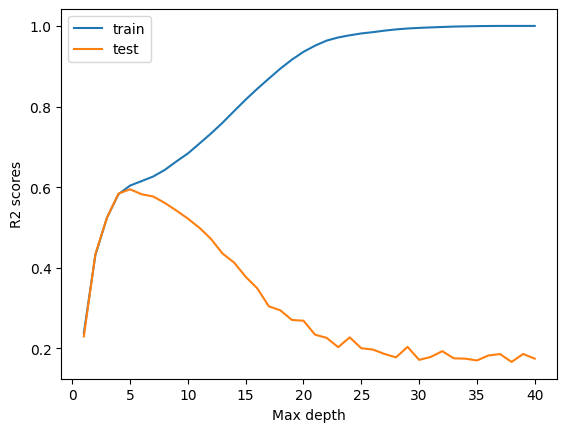

In [34]:
#plot the scores to visually determine the best max_depth
# plt.plot(scores);
plt.plot(depths, scores['Train'], label = 'train')
plt.plot(depths, scores['Test'], label = 'test')
plt.ylabel('R2 scores')
plt.xlabel('Max depth')
plt.legend()
plt.show()

In [35]:
# Sort the dataframe by test scores and save the index (k) of the best score
best_depth = scores.sort_values(by='Test', ascending=False).index[0]
best_depth

5

In [36]:
# Modeling the data using Decision Trees Regression with tuned params
best_dtr = DecisionTreeRegressor(max_depth=best_depth)

# Combine the transformer object and the decision trees model in a pipeline
best_dtr_pipe = make_pipeline(transformer, best_dtr)

# Fit your pipe on the training data
best_dtr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High'],
                                                                                              ['Tier '
                                                                                               '1',
                                                                                               'Tier '
                                                                                               '2',
                                                                                               'Tier '
                                                                                               '3'],
                                                                                              ['Grocery '
                                                                                               'Store',
                                                                                               'Supermarket '
                                                                                               'Type1',
                                                                                               'Supermarket '
                                                                                               'Type2',
                                                                                               'Super...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Item_Fat_Content',
                                                   'Item_Type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7938394792a0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor(max_depth=5))])

In [37]:
# Find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
print('Train Evaluation')
eval_model(y_train, best_dtr_pipe.predict(X_train))

print("="*50)

print('Test Evaluation')
eval_model(y_test, best_dtr_pipe.predict(X_test))

Train Evaluation
MAE 762.61
MSE 1172122.77
RMSE: 1082.65
R^2: 0.60
Test Evaluation
MAE 738.32
MSE 1118185.97
RMSE: 1057.44
R^2: 0.59


Running our tuned training using `DecisionTreeRegressor`, we are able to fit the data in both train and test data.

Our training data achieved an R2 score of 60%, while the test data only achieved 59%. RMSE score of the training data is 1082, while the training RMSE score is at 1057.

In this case, we are going to use the `DecisionTreeRegressor` as our best model. We are choosing this model because of the significant performance difference between `LinearRegression`.